INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0fe254f3c524d4153537de9712f3f235 NOW.


Inference for Stan model: anon_model_0fe254f3c524d4153537de9712f3f235.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.12    0.17    5.0   -1.6   4.87   8.06  11.34  18.32    836    1.0
tau        6.55    0.24   5.64   0.21   2.53   5.24   8.94  20.94    561   1.01
eta[1]     0.38    0.02   0.92  -1.46  -0.22    0.4   1.03   2.11   1497    1.0
eta[2]    -0.02    0.02   0.87  -1.77  -0.56  -0.04   0.52    1.8   1781    1.0
eta[3]    -0.19    0.02   0.93  -2.01   -0.8  -0.18    0.4   1.68   2273    1.0
eta[4]    -0.02    0.02   0.91  -1.78  -0.61  -0.03   0.59   1.84   2071    1.0
eta[5]    -0.33    0.02   0.89  -2.11  -0.91  -0.36   0.23    1.5   1793    1.0
eta[6]    -0.22    0.02   0.88  -2.01   -0.8  -0.23   0.37   1.48   1418    1.0
eta[7]     0.34    0.02   0.92  -1.58  -0.24   0.34   0.96   2.12   1438    1.0
eta[8]     0.

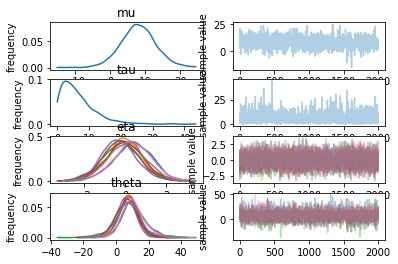

In [5]:
import pystan
import numpy as np
import matplotlib.pyplot as plt

schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
        theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

print(fit)

eta = fit.extract(permuted=True)['eta']
np.mean(eta, axis=0)

# if matplotlib is installed (optional, not required), a visual summary and
# traceplot are available
fit.plot()
plt.show()